In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Features/Data 2/Train/combined_data.csv')
df.head()

,SampleName,label,A,C,D,E,F,G,H,I,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
0,IKDNFIRF,1,0.000000,0.000000,0.125,0.000000,0.250000,0.000000,0.000000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,QERRAMGFVGMR,1,0.083333,0.000000,0.000,0.083333,0.083333,0.166667,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,APVSTGAGGGTVLAKMYPRGSHWAVGHLM,1,0.137931,0.000000,0.000,0.000000,0.000000,0.206897,0.068966,0.00,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,MRCYFLTGLAKLQS,0,0.071429,0.071429,0.000,0.000000,0.071429,0.071429,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,SYSMEHFRWGKPVGRKRRPVKVYTSNGVEEESAEVFPGEM,1,0.025000,0.000000,0.000,0.150000,0.050000,0.100000,0.025000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0


In [3]:
df.shape

(13188, 1017)

In [4]:
# Checking for duplicate rows
df.duplicated().sum()

5185

In [5]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(8003, 1017)

In [7]:
df2 = df.copy()

# check the min and max length of the sequences
df2['length'] = df2['SampleName'].apply(lambda x: len(x))
print('Max length:', df2['length'].max())
print('Min length:', df2['length'].min())

Max length: 99
Min length: 6


In [8]:
df['label'].value_counts()

label
0    4019
1    3984
Name: count, dtype: int64

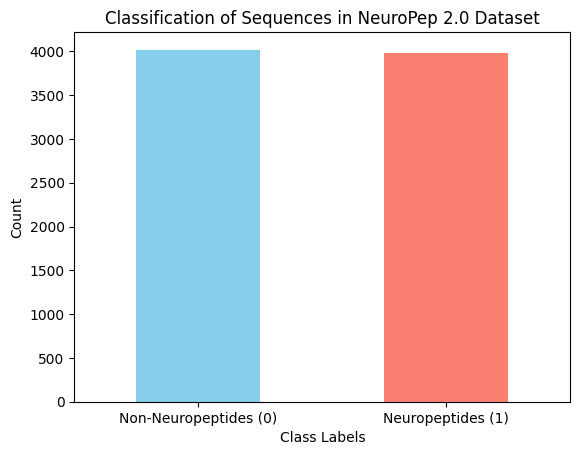

In [9]:
import matplotlib.pyplot as plt

# Plotting the value counts for the 'label' column
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding a title and labels
plt.title('Classification of Sequences in NeuroPep 2.0 Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# Setting custom x-axis tick labels with horizontal orientation
plt.xticks(ticks=[0, 1], labels=['Non-Neuropeptides (0)', 'Neuropeptides (1)'], rotation=0)

# Show the plot
plt.show()

In [10]:
# Checking for missing values
df.isnull().sum()

SampleName    0
label         0
A             0
C             0
D             0
             ..
YS_DPC        0
YT_DPC        0
YV_DPC        0
YW_DPC        0
YY_DPC        0
Length: 1017, dtype: int64

In [11]:
# print the columns with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [12]:
# checking column distribution
df.describe()

,label,A,C,D,E,F,G,H,I,K,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
count,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,...,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,0.497813,0.064818,0.025003,0.044479,0.046122,0.061330,0.079256,0.022497,0.044674,0.048706,...,0.000631,0.001513,0.001827,0.001086,0.001501,0.003480,0.001256,0.001515,0.000450,0.001107
std,0.500026,0.068911,0.051578,0.056373,0.061856,0.068261,0.081311,0.040355,0.056081,0.061798,...,0.007458,0.010818,0.012032,0.008145,0.009970,0.017567,0.009220,0.010250,0.005369,0.009267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.055556,0.000000,0.025641,0.020202,0.050000,0.064516,0.000000,0.025641,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.104957,0.022727,0.076923,0.076923,0.100000,0.116279,0.035191,0.076923,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.571429,0.400000,0.500000,0.583333,0.750000,0.833333,0.444444,0.375000,0.611111,...,0.200000,0.200000,0.200000,0.142857,0.166667,0.200000,0.222222,0.200000,0.142857,0.222222


In [13]:
# print the data types
df.dtypes

SampleName     object
label           int64
A             float64
C             float64
D             float64
               ...   
YS_DPC        float64
YT_DPC        float64
YV_DPC        float64
YW_DPC        float64
YY_DPC        float64
Length: 1017, dtype: object

# Model Building

In [14]:
X = df.drop(['SampleName','label'], axis=1)
y = df['label']


# standardising the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
# import the required libraries for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Conv1D,MaxPooling1D
from keras import backend as K

# from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

In [18]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1_val

In [55]:
def matthews_correlation_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_pred = tf.keras.backend.round(y_pred)
    
    TP = tf.keras.backend.sum(y_true * y_pred)
    TN = tf.keras.backend.sum((1 - y_true) * (1 - y_pred))
    FP = tf.keras.backend.sum((1 - y_true) * y_pred)
    FN = tf.keras.backend.sum(y_true * (1 - y_pred))
    
    numerator = (TP * TN) - (FP * FN)
    denominator = tf.keras.backend.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) + tf.keras.backend.epsilon())
    
    return tf.where(tf.equal(denominator, 0), tf.constant(0.0), numerator / denominator)

In [56]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
    matthews_correlation_coefficient,
]

In [99]:
X_train.shape

(6402, 1015, 1, 3)

In [100]:
input_shape = X_train.shape[1]

In [59]:
input_shape 

1015

# Base ANN

In [60]:
model = Sequential()
model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [62]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │       130,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,417 (548.50 KB)

 Trainable params: 140,417 (548.50 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100


2024-10-30 23:22:58.365862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7466 - auc: 0.8291 - loss: 0.4952 - matthews_correlation_coefficient: 0.4973 - precision: 0.7529 - recall: 0.7324 - val_accuracy: 0.8738 - val_auc: 0.9500 - val_loss: 0.2890 - val_matthews_correlation_coefficient: 0.7231 - val_precision: 0.8489 - val_recall: 0.9067
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8968 - auc: 0.9625 - loss: 0.2538 - matthews_correlation_coefficient: 0.7941 - precision: 0.8875 - recall: 0.9081 - val_accuracy: 0.8938 - val_auc: 0.9593 - val_loss: 0.2594 - val_matthews_correlation_coefficient: 0.7587 - val_precision: 0.8850 - val_recall: 0.9029
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9286 - auc: 0.9793 - loss: 0.1873 - matthews_correlation_coefficient: 0.8567 - precision: 0.9308 - recall: 0.9232 - val_accuracy: 0.8994 - val_auc: 0.9634 - val_loss: 0.2547 - val_matthews_correlation_coefficient: 0.7691 - val_precision: 0.8854 - val_recall: 0.9155
Epoch 4/1

In [70]:
metrics = model.evaluate(X_test, y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9086 - auc: 0.9409 - loss: 0.8586 - matthews_correlation_coefficient: 0.8195 - precision: 0.8840 - recall: 0.9354


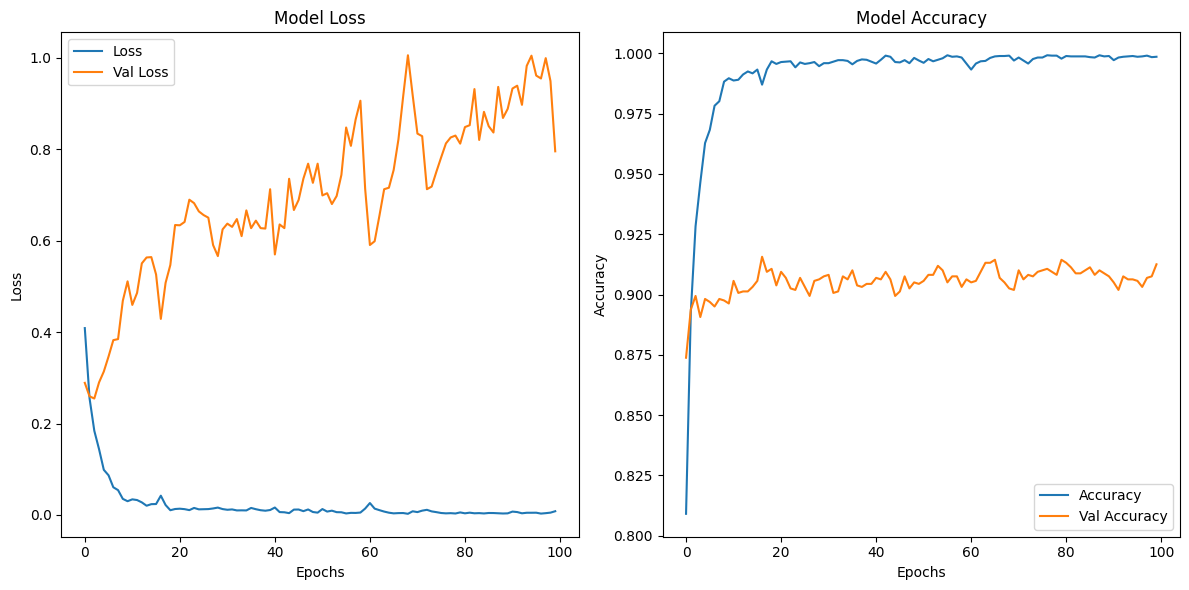

In [73]:
# plot the loss and accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Advanced ANN

In [76]:
model = Sequential()

model.add(Dense(256, input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [78]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │       260,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,281 (1.16 MB)

 Trainable params: 304,321 (1.16 MB)

 Non-trainable params: 960 (3.75 KB)

In [79]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7685 - auc: 0.8548 - loss: 0.6186 - matthews_correlation_coefficient: 0.3163 - precision: 0.7561 - recall: 0.7891 - val_accuracy: 0.8663 - val_auc: 0.9352 - val_loss: 0.3247 - val_matthews_correlation_coefficient: 0.7054 - val_precision: 0.8543 - val_recall: 0.8802
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8601 - auc: 0.9371 - loss: 0.3312 - matthews_correlation_coefficient: 0.7250 - precision: 0.8441 - recall: 0.8786 - val_accuracy: 0.8844 - val_auc: 0.9576 - val_loss: 0.2648 - val_matthews_correlation_coefficient: 0.7417 - val_precision: 0.8645 - val_recall: 0.9092
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8937 - auc: 0.9622 - loss: 0.2558 - matthews_correlation_coefficient: 0.7908 - precision: 0.8819 - recall: 0.9106 - val_accuracy: 0.8969 - val_auc: 0.9627 - val_loss: 0.2504 - val_matthews_correlation_coefficient: 0.7650 - val_precision: 0.8801 - val_recall: 0.91

In [80]:
metrics = model.evaluate(X_test, y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9017 - auc: 0.9586 - loss: 0.4254 - matthews_correlation_coefficient: 0.8048 - precision: 0.8676 - recall: 0.9416


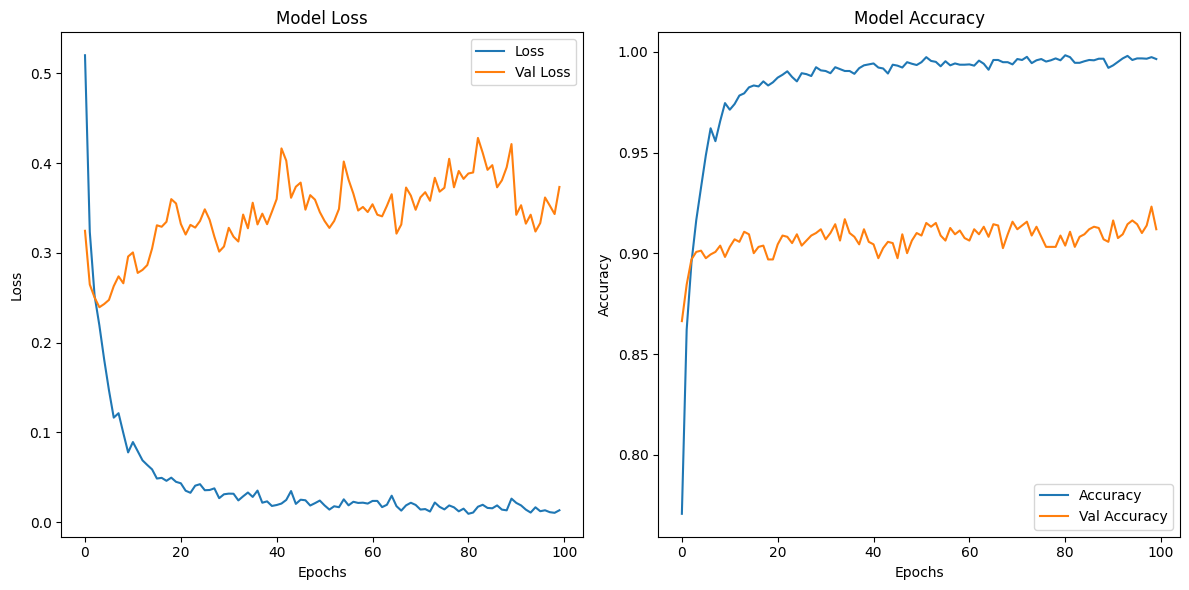

In [81]:
# plot the loss and accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# More Advanced ANN

In [117]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [118]:
model = Sequential()

model.add(Dense(512, input_shape=(input_shape,), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(32, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(16, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(8, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(4, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [120]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 512)            │       520,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │             

 Total params: 699,537 (2.67 MB)

 Trainable params: 697,497 (2.66 MB)

 Non-trainable params: 2,040 (7.97 KB)

In [121]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.6946 - auc: 0.7877 - loss: 2.0017 - matthews_correlation_coefficient: 0.1060 - precision: 0.7346 - recall: 0.5974 - val_accuracy: 0.8495 - val_auc: 0.9246 - val_loss: 1.7466 - val_matthews_correlation_coefficient: 0.6762 - val_precision: 0.8781 - val_recall: 0.8083
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.6753 - auc: 0.7522 - loss: 1.6942 - matthews_correlation_coefficient: 0.3619 - precision: 0.7094 - recall: 0.5940 - val_accuracy: 0.8545 - val_auc: 0.9322 - val_loss: 1.3870 - val_matthews_correlation_coefficient: 0.6827 - val_precision: 0.8294 - val_recall: 0.8890
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.7889 - auc: 0.8650 - loss: 1.3661 - matthews_correlation_coefficient: 0.5816 - precision: 0.7857 - recall: 0.7899 - val_accuracy: 0.8776 - val_auc: 0.9505 - val_loss: 1.0742 - val_matthews_correlation_coefficient: 0.7295 - val_precision: 0.8475 - val_recall:

In [122]:
metrics = model.evaluate(X_test, y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8893 - auc: 0.9529 - loss: 0.5116 - matthews_correlation_coefficient: 0.7808 - precision: 0.8519 - recall: 0.9350


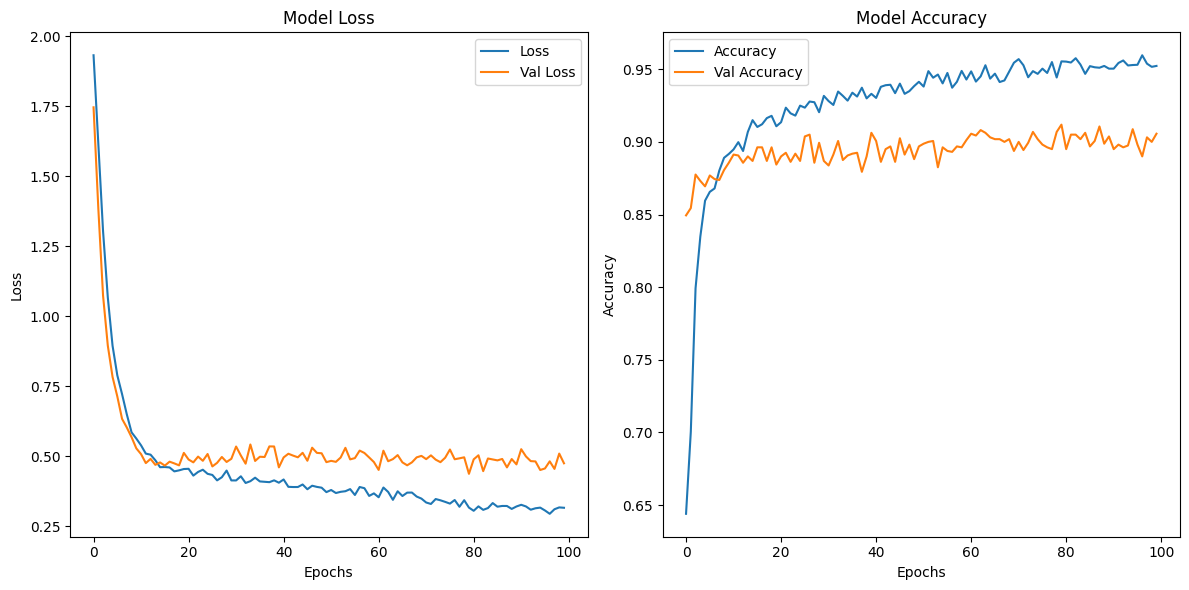

In [123]:
# plot the loss and accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# CNN as a Feature Extractor + Machine Learning Model

In [16]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Reshape your numerical data to a suitable 1D format for CNN input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape to (samples, features, channels)
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten()) 

2024-11-05 01:26:34.823752: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-05 01:26:34.823783: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-05 01:26:34.823791: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-05 01:26:34.824005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-05 01:26:34.824031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
cnn_layers = []

for layer in cnn_model.layers:
    cnn_layers.append(layer.name)

cnn_layers 

['conv1d', 'max_pooling1d', 'conv1d_1', 'max_pooling1d_1', 'flatten']

In [ ]:
weights = cnn_model.layers[0].get_weights()[0]
biases = cnn_model.layers[0].get_weights()[1]

weights.shape, biases.shape

((3, 1, 64), (64,))

In [ ]:
feature_extractor = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)

In [ ]:
X_train_features = feature_extractor.predict(X_train_cnn)
X_test_features = feature_extractor.predict(X_test_cnn)

 30/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

2024-11-05 01:26:35.237417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


### CNN + Logistic Regression

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_features, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_model.predict(X_test_features)
accuracy_cnn_lr = accuracy_score(y_test, y_pred)
precision_cnn_lr = precision_score(y_test, y_pred)
recall_cnn_lr = recall_score(y_test, y_pred)
f1_cnn_lr = f1_score(y_test, y_pred)
mathews_cnn_lr = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_lr = roc_auc_score(y_test, y_pred)

In [25]:
print("Logistic Regression Accuracy:", accuracy_cnn_lr)
print("Logistic Regression Precision:", precision_cnn_lr)
print("Logistic Regression Recall:", recall_cnn_lr)
print("Logistic Regression F1 Score:", f1_cnn_lr)
print("Logistic Regression Mathews Correlation Coefficient:", mathews_cnn_lr)
print("Logistic Regression ROC AUC Score:", roc_auc_cnn_lr)

Logistic Regression Accuracy: 0.8981886321049344
Logistic Regression Precision: 0.8841463414634146
Logistic Regression Recall: 0.914249684741488
Logistic Regression F1 Score: 0.8989460632362059
Logistic Regression Mathews Correlation Coefficient: 0.7968769280492165
Logistic Regression ROC AUC Score: 0.8983377136578727


In [26]:
classificationReport_cnn_lr = classification_report(y_test, y_pred)
print(classificationReport_cnn_lr)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       808
           1       0.88      0.91      0.90       793

    accuracy                           0.90      1601
   macro avg       0.90      0.90      0.90      1601
weighted avg       0.90      0.90      0.90      1601



In [27]:
conf_matrix_cnn_lr = confusion_matrix(y_test, y_pred)

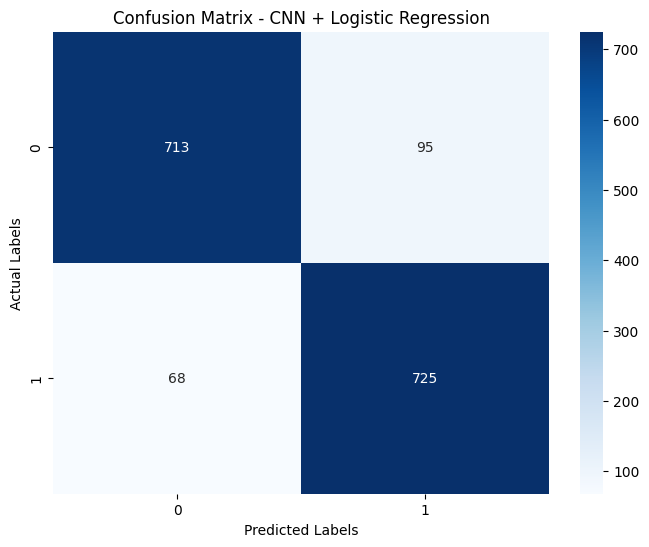

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Logistic Regression')
plt.show()

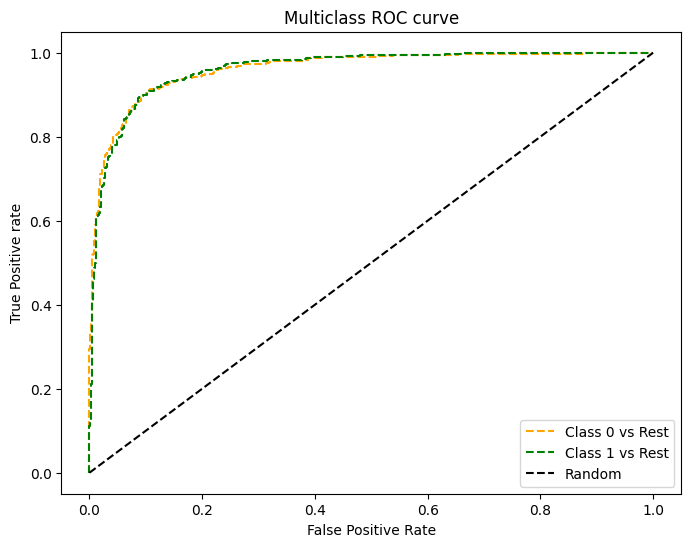

In [29]:
y_pred_proba = logistic_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")

plt.show()

### CNN + SVM

In [30]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_features, y_train)

SVC(probability=True)

In [31]:
y_pred = svm_model.predict(X_test_features)

In [32]:
accuracy_cnn_svm = accuracy_score(y_test, y_pred)
precision_cnn_svm = precision_score(y_test, y_pred)
recall_cnn_svm = recall_score(y_test, y_pred)
f1_cnn_svm = f1_score(y_test, y_pred)
mathews_cnn_svm = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_svm = roc_auc_score(y_test, y_pred)

In [33]:
print("SVM Accuracy:", accuracy_cnn_svm)
print("SVM Precision:", precision_cnn_svm)
print("SVM Recall:", recall_cnn_svm)
print("SVM F1 Score:", f1_cnn_svm)
print("SVM Mathews Correlation Coefficient:", mathews_cnn_svm)
print("SVM ROC AUC Score:", roc_auc_cnn_svm)

SVM Accuracy: 0.8813241723922548
SVM Precision: 0.8461538461538461
SVM Recall: 0.9293820933165196
SVM F1 Score: 0.8858173076923078
SVM Mathews Correlation Coefficient: 0.7664853344669045
SVM ROC AUC Score: 0.8817702545790518


In [34]:
classificationReport_cnn_svm = classification_report(y_test, y_pred)
print(classificationReport_cnn_svm)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       808
           1       0.85      0.93      0.89       793

    accuracy                           0.88      1601
   macro avg       0.88      0.88      0.88      1601
weighted avg       0.89      0.88      0.88      1601



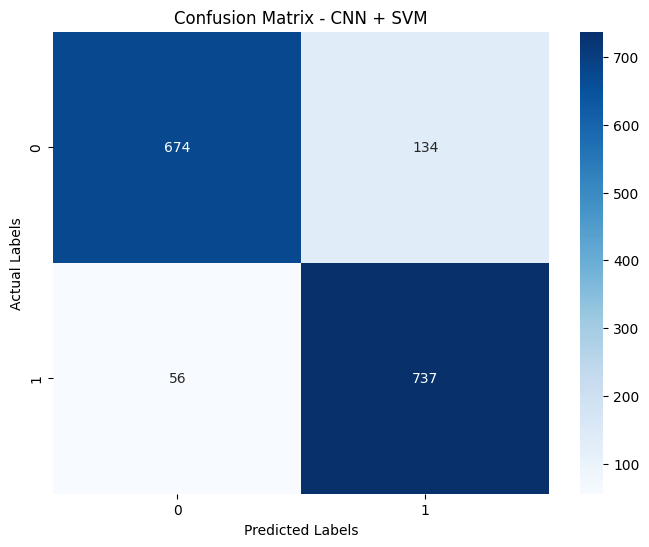

In [35]:
conf_matrix_cnn_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.title('Confusion Matrix - CNN + SVM')
plt.show()

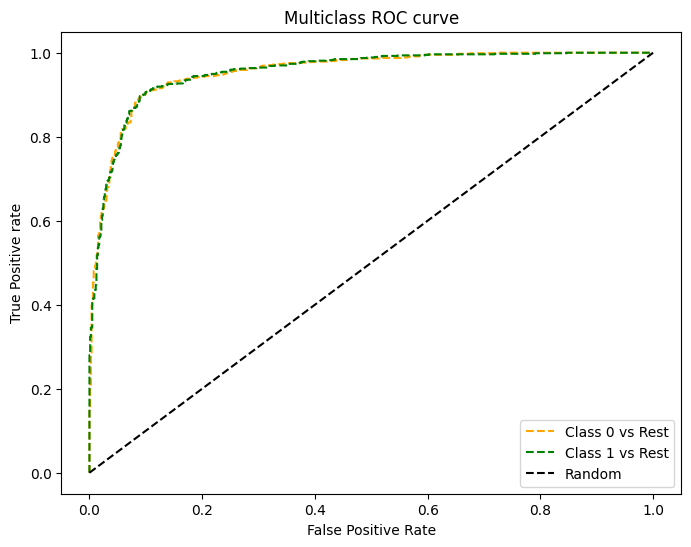

In [36]:
y_pred_proba = svm_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + KNN

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_features, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn_model.predict(X_test_features)

accuracy_cnn_knn = accuracy_score(y_test, y_pred)
precision_cnn_knn = precision_score(y_test, y_pred)
recall_cnn_knn = recall_score(y_test, y_pred)
f1_cnn_knn = f1_score(y_test, y_pred)
mathews_cnn_knn = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_knn = roc_auc_score(y_test, y_pred)

In [39]:
print("KNN Accuracy:", accuracy_cnn_knn)
print("KNN Precision:", precision_cnn_knn)
print("KNN Recall:", recall_cnn_knn)
print("KNN F1 Score:", f1_cnn_knn)
print("KNN Mathews Correlation Coefficient:", mathews_cnn_knn)
print("KNN ROC AUC Score:", roc_auc_cnn_knn)

KNN Accuracy: 0.7945034353529045
KNN Precision: 0.7600896860986547
KNN Recall: 0.8549810844892812
KNN F1 Score: 0.8047477744807121
KNN Mathews Correlation Coefficient: 0.5939968303275898
KNN ROC AUC Score: 0.7950647996703832


In [40]:
classificationReport_cnn_knn = classification_report(y_test, y_pred)
print(classificationReport_cnn_knn)

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       808
           1       0.76      0.85      0.80       793

    accuracy                           0.79      1601
   macro avg       0.80      0.80      0.79      1601
weighted avg       0.80      0.79      0.79      1601



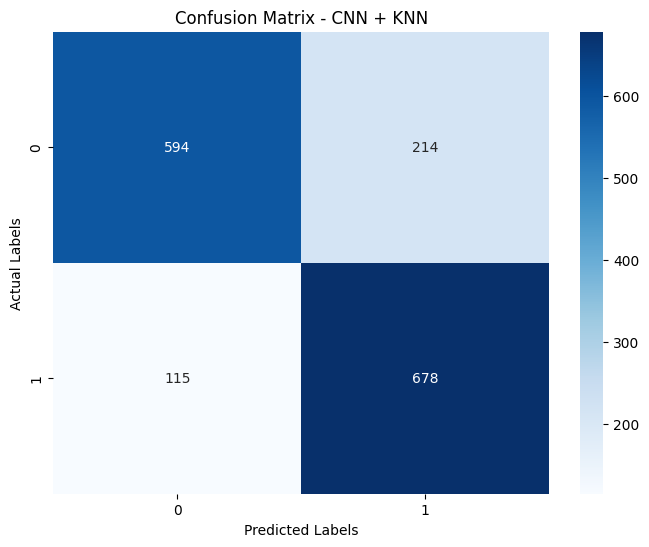

In [41]:
conf_matrix_cnn_knn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + KNN')
plt.show()

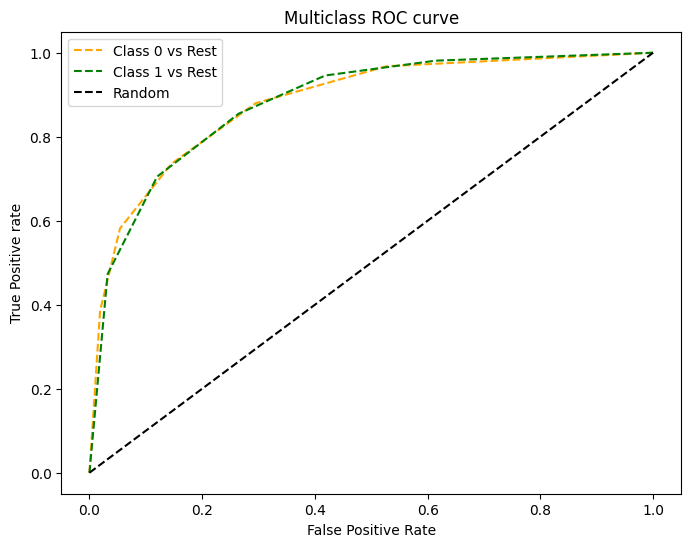

In [42]:
y_pred_proba = knn_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + Naive Bayes

In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train_features, y_train) 

GaussianNB()

In [44]:
y_pred = nb_model.predict(X_test_features)

In [45]:
accuracy_cnn_nb = accuracy_score(y_test, y_pred)
precision_cnn_nb = precision_score(y_test, y_pred)
recall_cnn_nb = recall_score(y_test, y_pred)
f1_cnn_nb = f1_score(y_test, y_pred)
mathews_cnn_nb = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_nb = roc_auc_score(y_test, y_pred)

In [46]:
print("Naive Bayes Accuracy:", accuracy_cnn_nb)
print("Naive Bayes Precision:", precision_cnn_nb)
print("Naive Bayes Recall:", recall_cnn_nb)
print("Naive Bayes F1 Score:", f1_cnn_nb)
print("Naive Bayes Mathews Correlation Coefficient:", mathews_cnn_nb)
print("Naive Bayes ROC AUC Score:", roc_auc_cnn_nb)

Naive Bayes Accuracy: 0.7470331043098064
Naive Bayes Precision: 0.803125
Naive Bayes Recall: 0.648171500630517
Naive Bayes F1 Score: 0.7173761339846476
Naive Bayes Mathews Correlation Coefficient: 0.5024113849933054
Naive Bayes ROC AUC Score: 0.7461154532855556


In [47]:
classificationReport_cnn_nb = classification_report(y_test, y_pred)
print(classificationReport_cnn_nb)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       808
           1       0.80      0.65      0.72       793

    accuracy                           0.75      1601
   macro avg       0.76      0.75      0.74      1601
weighted avg       0.76      0.75      0.74      1601



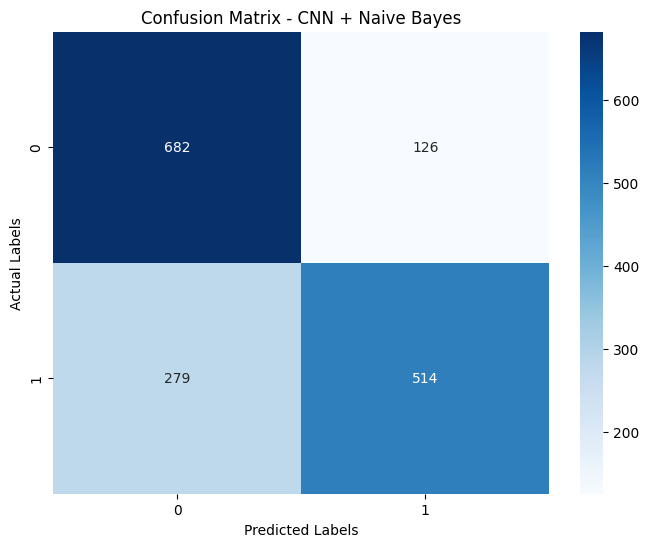

In [48]:
conf_matrix_cnn_nb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_nb, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Naive Bayes')
plt.show()

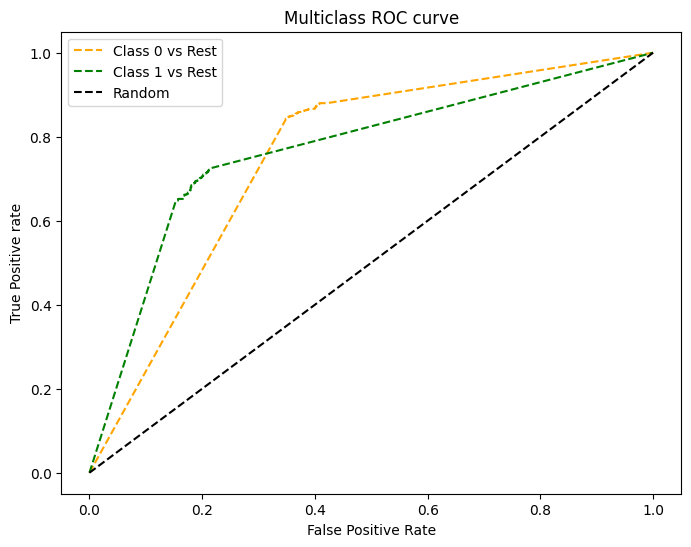

In [49]:
y_pred_proba = nb_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + Decision Tree

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = dt_model.predict(X_test_features)

In [52]:
accuracy_cnn_dt = accuracy_score(y_test, y_pred)
precision_cnn_dt = precision_score(y_test, y_pred)
recall_cnn_dt = recall_score(y_test, y_pred)
f1_cnn_dt = f1_score(y_test, y_pred)
mathews_cnn_dt = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_dt = roc_auc_score(y_test, y_pred)

In [53]:
print("Decision Tree Accuracy:", accuracy_cnn_dt)
print("Decision Tree Precision:", precision_cnn_dt)
print("Decision Tree Recall:", recall_cnn_dt)
print("Decision Tree F1 Score:", f1_cnn_dt)
print("Decision Tree Mathews Correlation Coefficient:", mathews_cnn_dt)
print("Decision Tree ROC AUC Score:", roc_auc_cnn_dt)

Decision Tree Accuracy: 0.7870081199250468
Decision Tree Precision: 0.7825
Decision Tree Recall: 0.7894073139974779
Decision Tree F1 Score: 0.7859384808537351
Decision Tree Mathews Correlation Coefficient: 0.5740356949916245
Decision Tree ROC AUC Score: 0.7870303896720063


In [54]:
classificationReport_cnn_dt = classification_report(y_test, y_pred)
print(classificationReport_cnn_dt)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       808
           1       0.78      0.79      0.79       793

    accuracy                           0.79      1601
   macro avg       0.79      0.79      0.79      1601
weighted avg       0.79      0.79      0.79      1601



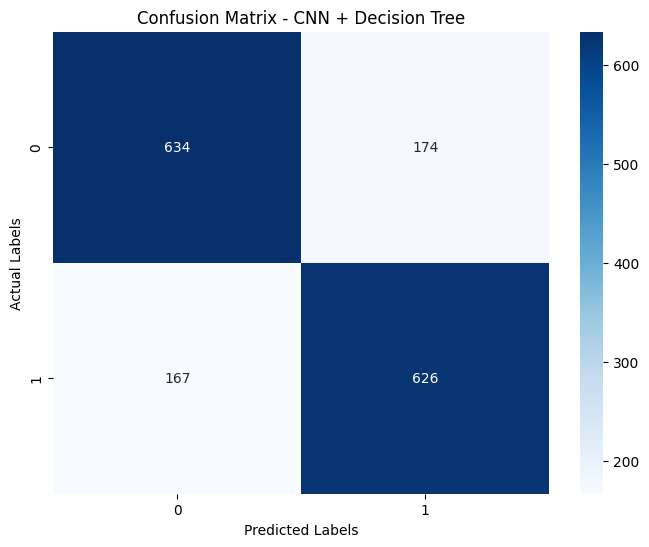

In [55]:
conf_matrix_cnn_dt = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Decision Tree')
plt.show()

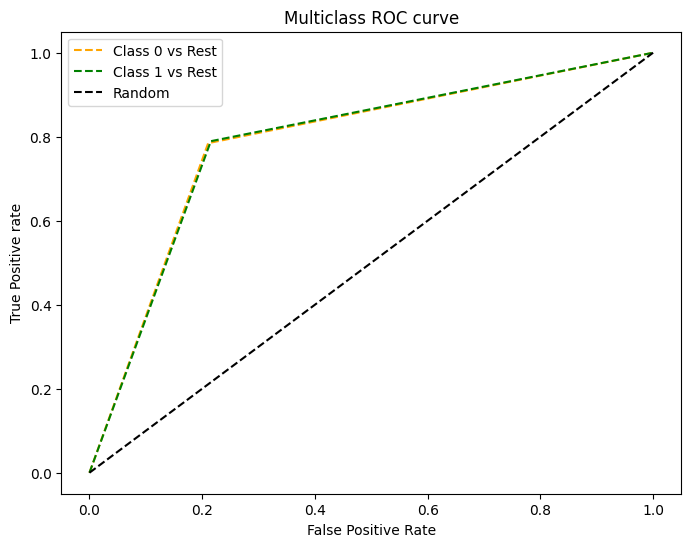

In [56]:
y_pred_proba = dt_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + Random Forest

In [57]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_features, y_train)

RandomForestClassifier()

In [58]:
y_pred = rf_model.predict(X_test_features)

In [59]:
accuracy_cnn_rf = accuracy_score(y_test, y_pred)
precision_cnn_rf = precision_score(y_test, y_pred)
recall_cnn_rf = recall_score(y_test, y_pred)
f1_cnn_rf = f1_score(y_test, y_pred)
mathews_cnn_rf = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_rf = roc_auc_score(y_test, y_pred)

In [60]:
print("Random Forest Accuracy:", accuracy_cnn_rf)
print("Random Forest Precision:", precision_cnn_rf)
print("Random Forest Recall:", recall_cnn_rf)
print("Random Forest F1 Score:", f1_cnn_rf)
print("Random Forest Mathews Correlation Coefficient:", mathews_cnn_rf) 
print("Random Forest ROC AUC Score:", roc_auc_cnn_rf)

Random Forest Accuracy: 0.8719550281074329
Random Forest Precision: 0.8516746411483254
Random Forest Recall: 0.8978562421185372
Random Forest F1 Score: 0.8741559238796808
Random Forest Mathews Correlation Coefficient: 0.7450912624223113
Random Forest ROC AUC Score: 0.8721954477919419


In [61]:
classificationReport_cnn_rf = classification_report(y_test, y_pred)
print(classificationReport_cnn_rf)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       808
           1       0.85      0.90      0.87       793

    accuracy                           0.87      1601
   macro avg       0.87      0.87      0.87      1601
weighted avg       0.87      0.87      0.87      1601



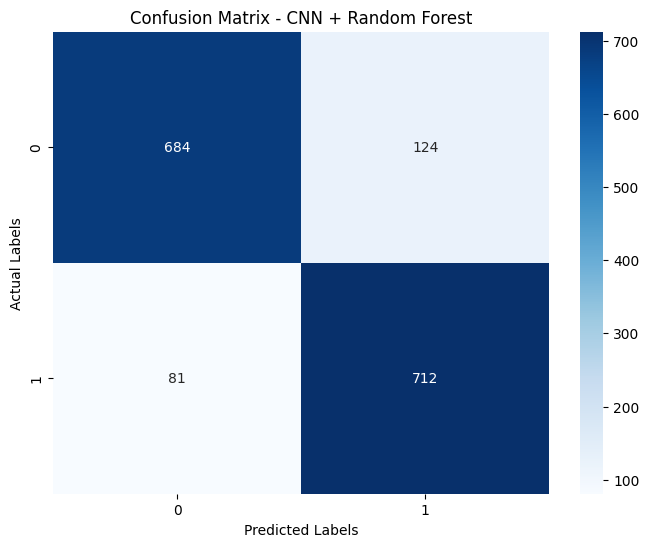

In [62]:
conf_matrix_cnn_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_rf, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Random Forest')
plt.show()

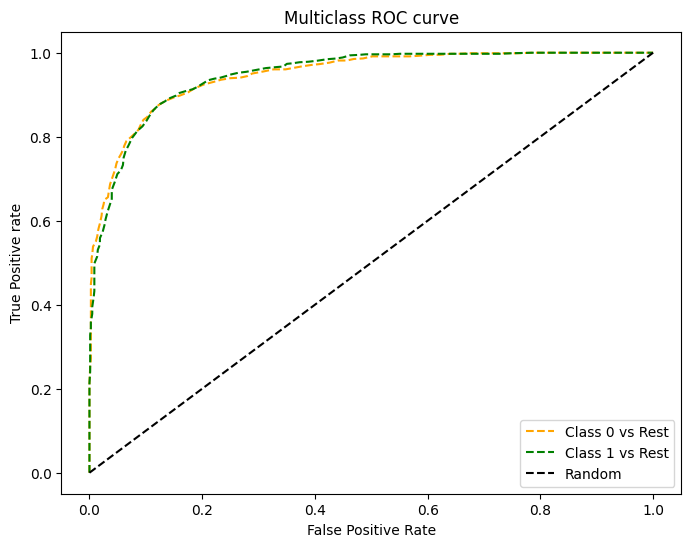

In [63]:
y_pred_proba = rf_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + XGBoost

In [64]:
xgb_model = XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = xgb_model.predict(X_test_features)

In [66]:
accuracy_cnn_xgb = accuracy_score(y_test, y_pred)
precision_cnn_xgb = precision_score(y_test, y_pred)
recall_cnn_xgb = recall_score(y_test, y_pred)
f1_cnn_xgb = f1_score(y_test, y_pred)
mathews_cnn_xgb = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_xgb = roc_auc_score(y_test, y_pred)

In [67]:
print("XGBoost Accuracy:", accuracy_cnn_xgb)
print("XGBoost Precision:", precision_cnn_xgb)
print("XGBoost Recall:", recall_cnn_xgb)
print("XGBoost F1 Score:", f1_cnn_xgb)
print("XGBoost Mathews Correlation Coefficient:", mathews_cnn_xgb)
print("XGBoost ROC AUC Score:", roc_auc_cnn_xgb)

XGBoost Accuracy: 0.9019362898188632
XGBoost Precision: 0.8859223300970874
XGBoost Recall: 0.9205548549810845
XGBoost F1 Score: 0.9029066171923315
XGBoost Mathews Correlation Coefficient: 0.8045296748577913
XGBoost ROC AUC Score: 0.9021091106588591


In [68]:
classificationReport_cnn_xgb = classification_report(y_test, y_pred)
print(classificationReport_cnn_xgb)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       808
           1       0.89      0.92      0.90       793

    accuracy                           0.90      1601
   macro avg       0.90      0.90      0.90      1601
weighted avg       0.90      0.90      0.90      1601



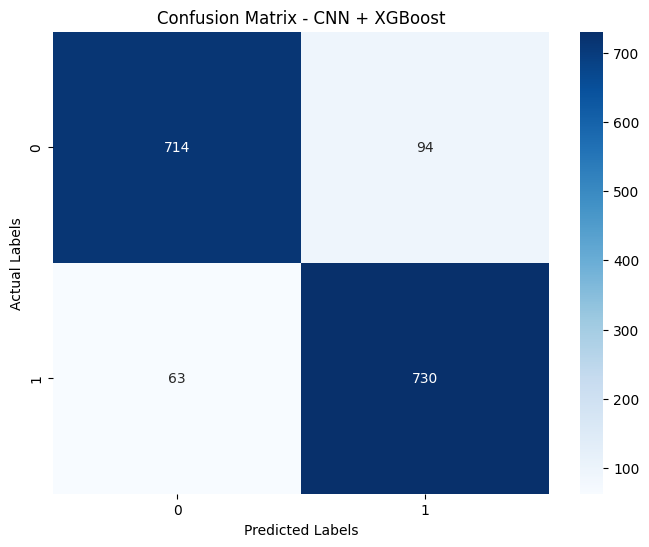

In [69]:
conf_matrix_cnn_xgb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + XGBoost')
plt.show()

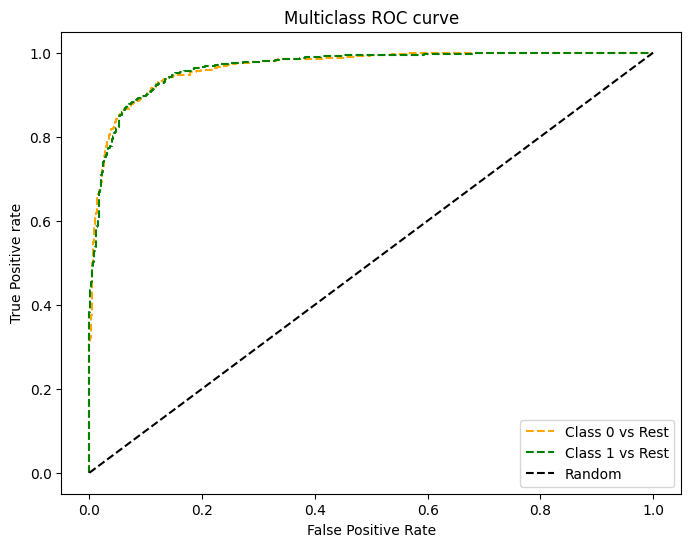

In [70]:
y_pred_proba = xgb_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + CatBoost

In [71]:
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss')
cat_model.fit(X_train_features, y_train)

0:	learn: 0.6398078	total: 5.82s	remaining: 1h 36m 57s
1:	learn: 0.5963132	total: 12.4s	remaining: 1h 43m 27s
2:	learn: 0.5589237	total: 19.2s	remaining: 1h 46m 23s
3:	learn: 0.5286081	total: 26.4s	remaining: 1h 49m 35s
4:	learn: 0.5056394	total: 33.4s	remaining: 1h 50m 50s
5:	learn: 0.4840722	total: 39.9s	remaining: 1h 50m 2s
6:	learn: 0.4688248	total: 46.3s	remaining: 1h 49m 23s
7:	learn: 0.4501789	total: 52.6s	remaining: 1h 48m 43s
8:	learn: 0.4372887	total: 59.2s	remaining: 1h 48m 39s
9:	learn: 0.4248370	total: 1m 5s	remaining: 1h 48m 52s
10:	learn: 0.4126694	total: 1m 13s	remaining: 1h 50m 11s
11:	learn: 0.4031569	total: 1m 20s	remaining: 1h 49m 47s
12:	learn: 0.3936993	total: 1m 26s	remaining: 1h 49m 36s
13:	learn: 0.3849942	total: 1m 32s	remaining: 1h 48m 44s
14:	learn: 0.3789438	total: 1m 39s	remaining: 1h 48m 31s
15:	learn: 0.3727428	total: 1m 45s	remaining: 1h 48m 31s
16:	learn: 0.3666137	total: 1m 52s	remaining: 1h 48m 41s
17:	learn: 0.3612265	total: 1m 59s	remaining: 1h 48m

In [72]:
y_pred = cat_model.predict(X_test_features)

In [73]:
accuracy_cnn_cat = accuracy_score(y_test, y_pred)
precision_cnn_cat = precision_score(y_test, y_pred)
recall_cnn_cat = recall_score(y_test, y_pred)
f1_cnn_cat = f1_score(y_test, y_pred)
mathews_cnn_cat = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_cat = roc_auc_score(y_test, y_pred)

In [74]:
print("CatBoost Accuracy:", accuracy_cnn_cat)
print("CatBoost Precision:", precision_cnn_cat)
print("CatBoost Recall:", recall_cnn_cat)
print("CatBoost F1 Score:", f1_cnn_cat)
print("CatBoost Mathews Correlation Coefficient:", mathews_cnn_cat)
print("CatBoost ROC AUC Score:", roc_auc_cnn_cat)

CatBoost Accuracy: 0.9113054341036851
CatBoost Precision: 0.8898203592814371
CatBoost Recall: 0.9369482976040353
CatBoost F1 Score: 0.9127764127764127
CatBoost Mathews Correlation Coefficient: 0.823816236533367
CatBoost ROC AUC Score: 0.9115434557327107


In [75]:
classificationReport_cnn_cat = classification_report(y_test, y_pred)
print(classificationReport_cnn_cat)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       808
           1       0.89      0.94      0.91       793

    accuracy                           0.91      1601
   macro avg       0.91      0.91      0.91      1601
weighted avg       0.91      0.91      0.91      1601



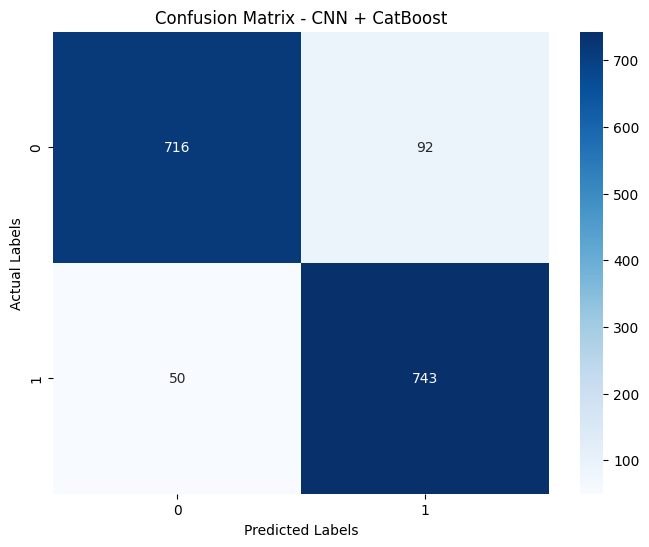

In [76]:
conf_matrix_cnn_cat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + CatBoost')
plt.show()

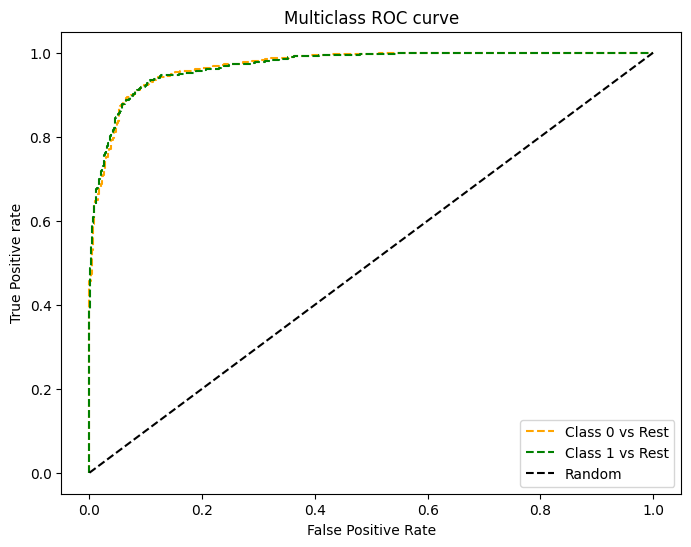

In [77]:
y_pred_proba = cat_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### Comparison

In [78]:
evaluation_metrics = pd.DataFrame({
    'Model': [ 'CNN + Logistic Regression', 'CNN + SVM', 'CNN + KNN', 'CNN + Naive Bayes', 'CNN + Decision Tree', 'CNN + Random Forest', 'CNN + XGBoost', 'CNN + CatBoost'],
    'Accuracy': [accuracy_cnn_lr, accuracy_cnn_svm, accuracy_cnn_knn, accuracy_cnn_nb, accuracy_cnn_dt, accuracy_cnn_rf, accuracy_cnn_xgb, accuracy_cnn_cat],
    'Precision': [precision_cnn_lr, precision_cnn_svm, precision_cnn_knn, precision_cnn_nb, precision_cnn_dt, precision_cnn_rf, precision_cnn_xgb, precision_cnn_cat],
    'Recall': [recall_cnn_lr, recall_cnn_svm, recall_cnn_knn, recall_cnn_nb, recall_cnn_dt, recall_cnn_rf, recall_cnn_xgb, recall_cnn_cat],
    'F1 Score': [f1_cnn_lr, f1_cnn_svm, f1_cnn_knn, f1_cnn_nb, f1_cnn_dt, f1_cnn_rf, f1_cnn_xgb, f1_cnn_cat],
    'Mathews Correlation Coefficient': [mathews_cnn_lr, mathews_cnn_svm, mathews_cnn_knn, mathews_cnn_nb, mathews_cnn_dt, mathews_cnn_rf, mathews_cnn_xgb, mathews_cnn_cat],
    'ROC AUC Score': [roc_auc_cnn_lr, roc_auc_cnn_svm, roc_auc_cnn_knn, roc_auc_cnn_nb, roc_auc_cnn_dt, roc_auc_cnn_rf, roc_auc_cnn_xgb, roc_auc_cnn_cat]

})

best_models = {
    'Accuracy': evaluation_metrics.loc[evaluation_metrics['Accuracy'].idxmax(), 'Model'],
    'Precision': evaluation_metrics.loc[evaluation_metrics['Precision'].idxmax(), 'Model'],
    'Recall': evaluation_metrics.loc[evaluation_metrics['Recall'].idxmax(), 'Model'],
    'F1 Score': evaluation_metrics.loc[evaluation_metrics['F1 Score'].idxmax(), 'Model'],
    'Mathews Correlation Coefficient': evaluation_metrics.loc[evaluation_metrics['Mathews Correlation Coefficient'].idxmax(), 'Model'],
    'ROC AUC Score': evaluation_metrics.loc[evaluation_metrics['ROC AUC Score'].idxmax(), 'Model']
}

transposed_metrics = evaluation_metrics.set_index('Model').transpose()

transposed_metrics['Best Model'] = transposed_metrics.apply(lambda x: best_models[x.name], axis=1)

transposed_metrics

Model,CNN + Logistic Regression,CNN + SVM,CNN + KNN,CNN + Naive Bayes,CNN + Decision Tree,CNN + Random Forest,CNN + XGBoost,CNN + CatBoost,Best Model
Accuracy,0.898189,0.881324,0.794503,0.747033,0.787008,0.871955,0.901936,0.911305,CNN + CatBoost
Precision,0.884146,0.846154,0.760090,0.803125,0.782500,0.851675,0.885922,0.889820,CNN + CatBoost
Recall,0.914250,0.929382,0.854981,0.648172,0.789407,0.897856,0.920555,0.936948,CNN + CatBoost
F1 Score,0.898946,0.885817,0.804748,0.717376,0.785938,0.874156,0.902907,0.912776,CNN + CatBoost
Mathews Correlation Coefficient,0.796877,0.766485,0.593997,0.502411,0.574036,0.745091,0.804530,0.823816,CNN + CatBoost
ROC AUC Score,0.898338,0.881770,0.795065,0.746115,0.787030,0.872195,0.902109,0.911543,CNN + CatBoost
